In [123]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [124]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [125]:
# mont Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
df_data_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")
X_train = df_data_train.values
y_train = df_info_train['emotion']

df_data_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TEST_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TEST_no_outliers.xlsx", index_col="Unnamed: 0")
X_test = df_data_test.values
y_test = df_info_test['emotion']

In [127]:
from sklearn.model_selection import RepeatedStratifiedKFold

# Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [129]:
clf = RandomForestClassifier(n_estimators=100, #The number of trees in the forest.
                             criterion='gini', #The function to measure the quality of a split. 
                             max_depth=None,  #The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
                             min_samples_split=2, #The minimum number of samples required to split an internal node:
                             min_samples_leaf=1, #The minimum number of samples required to be at a leaf node
                             min_weight_fraction_leaf=0.0, 
                             max_features='auto', #The number of features to consider when looking for the best split:{“sqrt”, “log2”, None}
                             random_state=0, 
                             n_jobs=-1)  #The number of jobs to run in parallel.
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy 0.41029900332225916
F1-score [0.61276596 0.50515464 0.30588235 0.30463576 0.3814433  0.21052632
 0.27807487 0.41584158]
              precision    recall  f1-score   support

       angry       0.51      0.77      0.61        94
        calm       0.48      0.54      0.51        91
     disgust       0.35      0.27      0.31        48
     fearful       0.39      0.25      0.30        92
       happy       0.37      0.40      0.38        93
     neutral       0.55      0.13      0.21        46
         sad       0.28      0.28      0.28        94
   surprised       0.37      0.48      0.42        44

    accuracy                           0.41       602
   macro avg       0.41      0.39      0.38       602
weighted avg       0.41      0.41      0.39       602



In [130]:
classification_report(y_test, y_pred, output_dict=True)

{'angry': {'precision': 0.5106382978723404,
  'recall': 0.7659574468085106,
  'f1-score': 0.6127659574468084,
  'support': 94},
 'calm': {'precision': 0.47572815533980584,
  'recall': 0.5384615384615384,
  'f1-score': 0.5051546391752576,
  'support': 91},
 'disgust': {'precision': 0.35135135135135137,
  'recall': 0.2708333333333333,
  'f1-score': 0.3058823529411765,
  'support': 48},
 'fearful': {'precision': 0.3898305084745763,
  'recall': 0.25,
  'f1-score': 0.304635761589404,
  'support': 92},
 'happy': {'precision': 0.36633663366336633,
  'recall': 0.3978494623655914,
  'f1-score': 0.3814432989690722,
  'support': 93},
 'neutral': {'precision': 0.5454545454545454,
  'recall': 0.13043478260869565,
  'f1-score': 0.21052631578947367,
  'support': 46},
 'sad': {'precision': 0.27956989247311825,
  'recall': 0.2765957446808511,
  'f1-score': 0.27807486631016043,
  'support': 94},
 'surprised': {'precision': 0.3684210526315789,
  'recall': 0.4772727272727273,
  'f1-score': 0.4158415841584

In [131]:
import json
json.dumps(classification_report(y_test, y_pred, output_dict=True))

'{"angry": {"precision": 0.5106382978723404, "recall": 0.7659574468085106, "f1-score": 0.6127659574468084, "support": 94}, "calm": {"precision": 0.47572815533980584, "recall": 0.5384615384615384, "f1-score": 0.5051546391752576, "support": 91}, "disgust": {"precision": 0.35135135135135137, "recall": 0.2708333333333333, "f1-score": 0.3058823529411765, "support": 48}, "fearful": {"precision": 0.3898305084745763, "recall": 0.25, "f1-score": 0.304635761589404, "support": 92}, "happy": {"precision": 0.36633663366336633, "recall": 0.3978494623655914, "f1-score": 0.3814432989690722, "support": 93}, "neutral": {"precision": 0.5454545454545454, "recall": 0.13043478260869565, "f1-score": 0.21052631578947367, "support": 46}, "sad": {"precision": 0.27956989247311825, "recall": 0.2765957446808511, "f1-score": 0.27807486631016043, "support": 94}, "surprised": {"precision": 0.3684210526315789, "recall": 0.4772727272727273, "f1-score": 0.4158415841584158, "support": 44}, "accuracy": 0.41029900332225916

In [132]:
json.loads(json.dumps(classification_report(y_test, y_pred, output_dict=True)))

{'angry': {'precision': 0.5106382978723404,
  'recall': 0.7659574468085106,
  'f1-score': 0.6127659574468084,
  'support': 94},
 'calm': {'precision': 0.47572815533980584,
  'recall': 0.5384615384615384,
  'f1-score': 0.5051546391752576,
  'support': 91},
 'disgust': {'precision': 0.35135135135135137,
  'recall': 0.2708333333333333,
  'f1-score': 0.3058823529411765,
  'support': 48},
 'fearful': {'precision': 0.3898305084745763,
  'recall': 0.25,
  'f1-score': 0.304635761589404,
  'support': 92},
 'happy': {'precision': 0.36633663366336633,
  'recall': 0.3978494623655914,
  'f1-score': 0.3814432989690722,
  'support': 93},
 'neutral': {'precision': 0.5454545454545454,
  'recall': 0.13043478260869565,
  'f1-score': 0.21052631578947367,
  'support': 46},
 'sad': {'precision': 0.27956989247311825,
  'recall': 0.2765957446808511,
  'f1-score': 0.27807486631016043,
  'support': 94},
 'surprised': {'precision': 0.3684210526315789,
  'recall': 0.4772727272727273,
  'f1-score': 0.4158415841584

In [133]:
print(df_data_train.columns)

Index(['sum', 'std', 'q25', 'kur', 'skew', 'lag1_sum', 'lag1_kur', 'lag1_skew',
       'zc_sum', 'mfcc_sum', 'mfcc_mean', 'mfcc_max', 'mfcc_q05', 'mfcc_q25',
       'mfcc_q75', 'mfcc_q95', 'mfcc_kur', 'mfcc_skew', 'sc_sum', 'sc_mean',
       'sc_std', 'sc_min', 'sc_max', 'sc_q25', 'stft_sum', 'stft_std',
       'stft_min', 'stft_kur', 'sum_w1', 'std_w1', 'q25_w1', 'kur_w1',
       'skew_w1', 'lag1_sum_w1', 'lag1_skew_w1', 'zc_sum_w1', 'zc_kur_w1',
       'mfcc_sum_w1', 'mfcc_max_w1', 'mfcc_q05_w1', 'mfcc_q25_w1',
       'mfcc_q95_w1', 'mfcc_q99_w1', 'mfcc_kur_w1', 'sc_sum_w1', 'sc_std_w1',
       'sc_kur_w1', 'sc_skew_w1', 'stft_min_w1', 'stft_kur_w1', 'sum_w2',
       'q50_w2', 'lag1_sum_w2', 'lag1_q50_w2', 'zc_sum_w2', 'mfcc_q95_w2',
       'mfcc_kur_w2', 'sc_std_w2', 'sc_min_w2', 'stft_sum_w2', 'stft_std_w2',
       'sum_w3', 'q50_w3', 'kur_w3', 'lag1_sum_w3', 'lag1_q50_w3',
       'lag1_kur_w3', 'lag1_skew_w3', 'zc_sum_w3', 'mfcc_q95_w3',
       'mfcc_kur_w3', 'sc_std_w3', 'sc_min_

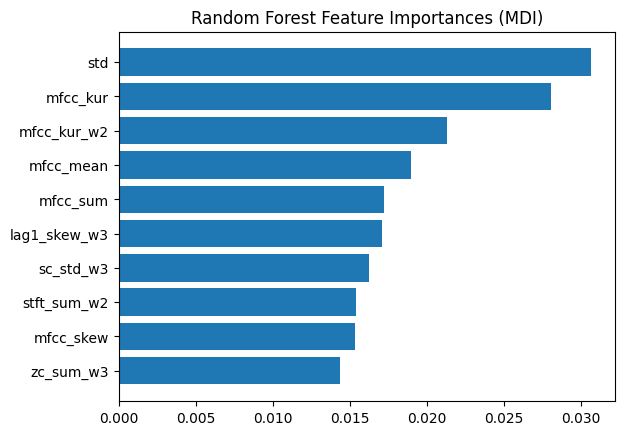

In [134]:
#plot delle 10 features più rilevanti per la classificazione

nbr_features = 10

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(df_data_train.columns)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [135]:
from sklearn.inspection import permutation_importance

In [136]:
# usato per fare feature evaluation
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

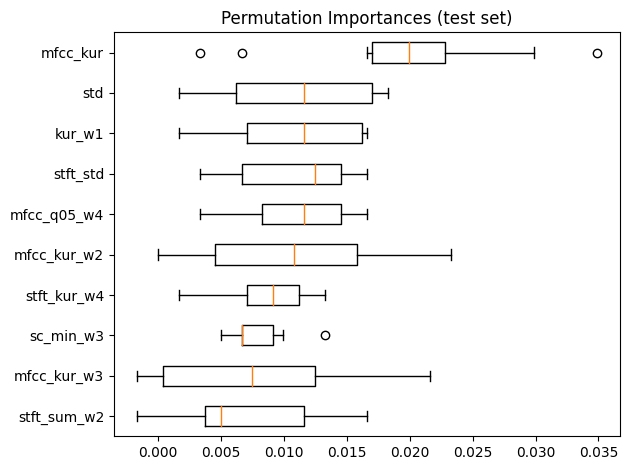

In [137]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(df_data_test.columns)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [80]:
from sklearn.tree import plot_tree

In [84]:
len(clf.estimators_) #numero di alberi totale della foresta, volendo potremmo stamparli cambiando l'indice(vedi sotto)

100

In [90]:
clf.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

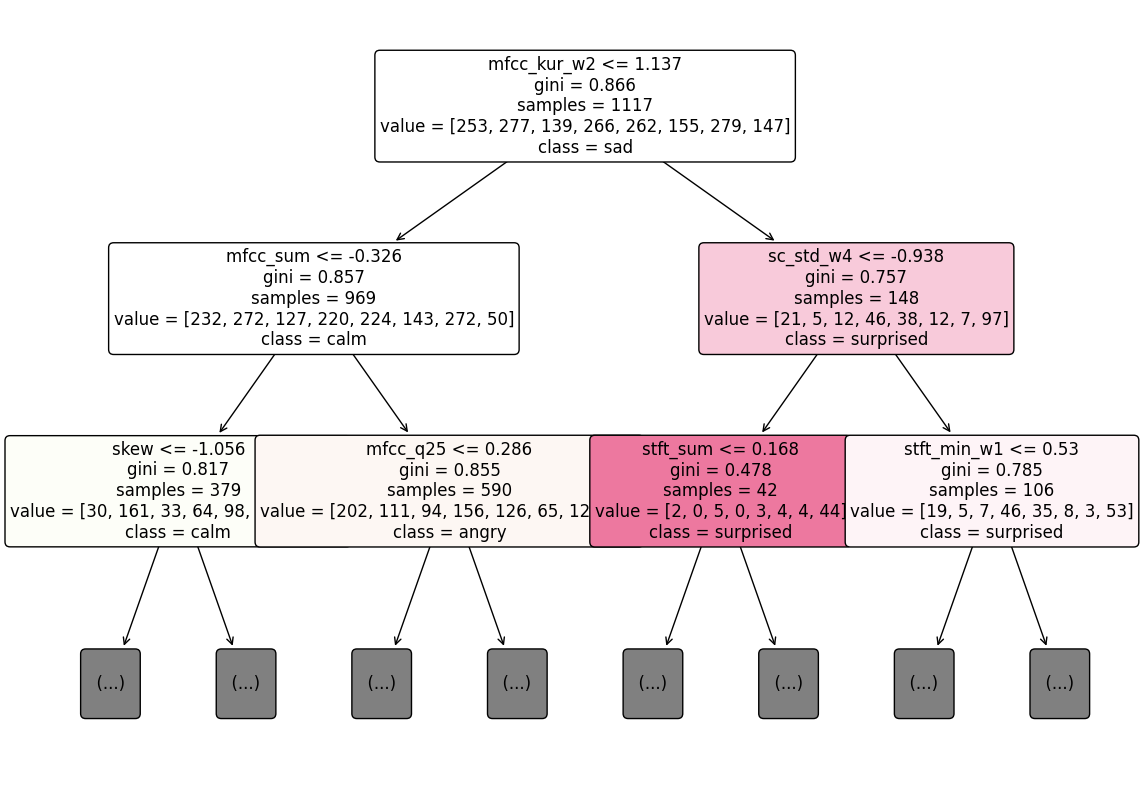

In [138]:
#PLOT DELL'ALBERO CON INDICE 0

plt.figure(figsize=(14,10))
plot_tree(clf.estimators_[0], 
          feature_names=df_data_train.columns, 
          class_names=['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised'], 
          filled=True, 
          rounded=True,
          fontsize=12,
          max_depth=2)  
plt.show()

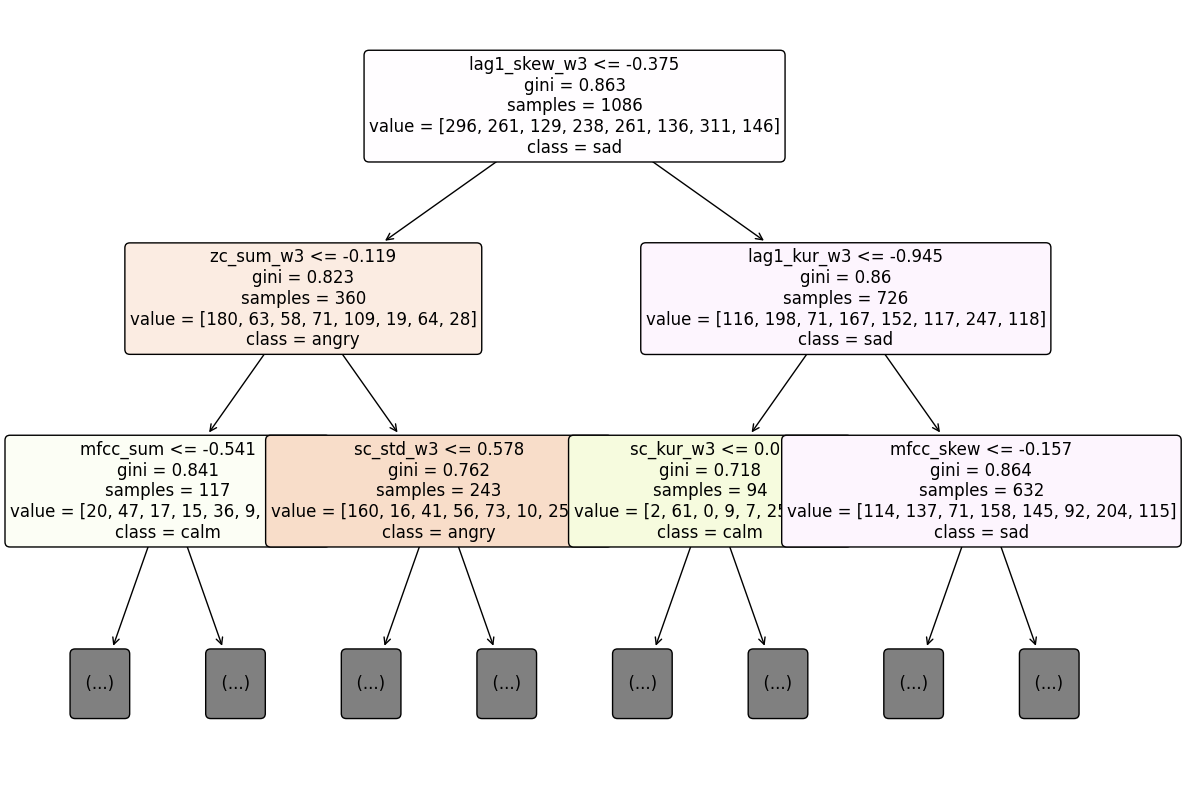

In [139]:
#PLOT DELL'ALBERO CON INDICE 1

plt.figure(figsize=(14,10))
plot_tree(clf.estimators_[1], 
          feature_names=df_data_train.columns, 
          class_names=['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised'], 
          filled=True, 
          rounded=True,
          fontsize=12,
          max_depth=2)  
plt.show()

In [140]:
#MODELL0 PRIMA DEL TUNING

clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=4, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4269102990033223
F1-score [0.5785124  0.55924171 0.44705882 0.36477987 0.33879781 0.21428571
 0.32183908 0.31914894]
              precision    recall  f1-score   support

       angry       0.47      0.74      0.58        94
        calm       0.49      0.65      0.56        91
     disgust       0.51      0.40      0.45        48
     fearful       0.43      0.32      0.36        92
       happy       0.34      0.33      0.34        93
     neutral       0.60      0.13      0.21        46
         sad       0.35      0.30      0.32        94
   surprised       0.30      0.34      0.32        44

    accuracy                           0.43       602
   macro avg       0.44      0.40      0.39       602
weighted avg       0.43      0.43      0.41       602



In [141]:
# MODELLO DOPO IL TUNING USANDO RANDOM
#RISULTATI -> 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 18

clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=18, min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=4, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.42358803986710963
F1-score [0.60330579 0.52682927 0.42352941 0.33783784 0.35869565 0.20338983
 0.32222222 0.33663366]
              precision    recall  f1-score   support

       angry       0.49      0.78      0.60        94
        calm       0.47      0.59      0.53        91
     disgust       0.49      0.38      0.42        48
     fearful       0.45      0.27      0.34        92
       happy       0.36      0.35      0.36        93
     neutral       0.46      0.13      0.20        46
         sad       0.34      0.31      0.32        94
   surprised       0.30      0.39      0.34        44

    accuracy                           0.42       602
   macro avg       0.42      0.40      0.39       602
weighted avg       0.42      0.42      0.41       602



In [142]:
# MODELLO DOPO IL TUNING USANDO GRID 
#RISULTATI -> 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 5

clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=14, min_samples_split=5, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, max_features=4, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.42358803986710963
F1-score [0.56666667 0.55813953 0.38961039 0.35761589 0.37362637 0.04
 0.31182796 0.40776699]
              precision    recall  f1-score   support

       angry       0.47      0.72      0.57        94
        calm       0.48      0.66      0.56        91
     disgust       0.52      0.31      0.39        48
     fearful       0.46      0.29      0.36        92
       happy       0.38      0.37      0.37        93
     neutral       0.25      0.02      0.04        46
         sad       0.32      0.31      0.31        94
   surprised       0.36      0.48      0.41        44

    accuracy                           0.42       602
   macro avg       0.40      0.40      0.38       602
weighted avg       0.41      0.42      0.40       602



## Cross validation

In [143]:
from sklearn.model_selection import cross_val_score

In [144]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5)

print('Accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuracy 0.429 +/- 0.021


## Hiperparameter tuning

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [146]:
#HYPERPARAMETER TUNING USANDO IL RANDOMIZED SEARCH

param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.43853820598006643
F1-score [0.59915612 0.53       0.42352941 0.31884058 0.4040404  0.07843137
 0.3626943  0.45098039]
              precision    recall  f1-score   support

       angry       0.50      0.76      0.60        94
        calm       0.49      0.58      0.53        91
     disgust       0.49      0.38      0.42        48
     fearful       0.48      0.24      0.32        92
       happy       0.38      0.43      0.40        93
     neutral       0.40      0.04      0.08        46
         sad       0.35      0.37      0.36        94
   surprised       0.40      0.52      0.45        44

    accuracy                           0.44       602
   macro avg       0.43      0.42      0.40       602
weighted avg       0.44      0.44      0.41       602



In [98]:
random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 18}

In [102]:
#HYPERPARAMETER TUNING USANDO GRID SEARCH

param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
              'max_depth': [None] + list(np.arange(2, 20))
             }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.42358803986710963
F1-score [0.56666667 0.55813953 0.38961039 0.35761589 0.37362637 0.04
 0.31182796 0.40776699]
              precision    recall  f1-score   support

       angry       0.47      0.72      0.57        94
        calm       0.48      0.66      0.56        91
     disgust       0.52      0.31      0.39        48
     fearful       0.46      0.29      0.36        92
       happy       0.38      0.37      0.37        93
     neutral       0.25      0.02      0.04        46
         sad       0.32      0.31      0.31        94
   surprised       0.36      0.48      0.41        44

    accuracy                           0.42       602
   macro avg       0.40      0.40      0.38       602
weighted avg       0.41      0.42      0.40       602



In [105]:
print(grid_search.best_params_)

{'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 5}


# Bagging

In [107]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [108]:
#PROVA DI BEGGING CON ESTIMATOR = DECISION TREE

clf = BaggingClassifier(estimator=None,  #The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a DecisionTreeClassifier.
                        n_estimators=100, #The number of base estimators in the ensemble.
                        random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4368770764119601
F1-score [0.5907173  0.51111111 0.42105263 0.35862069 0.35978836 0.25806452
 0.35353535 0.48979592]
              precision    recall  f1-score   support

       angry       0.49      0.74      0.59        94
        calm       0.52      0.51      0.51        91
     disgust       0.43      0.42      0.42        48
     fearful       0.49      0.28      0.36        92
       happy       0.35      0.37      0.36        93
     neutral       0.50      0.17      0.26        46
         sad       0.34      0.37      0.35        94
   surprised       0.44      0.55      0.49        44

    accuracy                           0.44       602
   macro avg       0.44      0.43      0.42       602
weighted avg       0.44      0.44      0.42       602



In [119]:
#PROVA DI BEGGING CON ESTIMATOR = SVC

clf = BaggingClassifier(estimator=SVC(C=1000), 
                        n_estimators=10, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.46677740863787376
F1-score [0.58577406 0.53763441 0.48543689 0.43209877 0.39325843 0.37837838
 0.35227273 0.48837209]
              precision    recall  f1-score   support

       angry       0.48      0.74      0.59        94
        calm       0.53      0.55      0.54        91
     disgust       0.45      0.52      0.49        48
     fearful       0.50      0.38      0.43        92
       happy       0.41      0.38      0.39        93
     neutral       0.50      0.30      0.38        46
         sad       0.38      0.33      0.35        94
   surprised       0.50      0.48      0.49        44

    accuracy                           0.47       602
   macro avg       0.47      0.46      0.46       602
weighted avg       0.46      0.47      0.46       602



In [121]:
#PROVA DI BEGGING CON ESTIMATOR = RANDOM FOREST

clf = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.43521594684385384
F1-score [0.61157025 0.54187192 0.3        0.33333333 0.39583333 0.1509434
 0.34736842 0.44      ]
              precision    recall  f1-score   support

       angry       0.50      0.79      0.61        94
        calm       0.49      0.60      0.54        91
     disgust       0.38      0.25      0.30        48
     fearful       0.46      0.26      0.33        92
       happy       0.38      0.41      0.40        93
     neutral       0.57      0.09      0.15        46
         sad       0.34      0.35      0.35        94
   surprised       0.39      0.50      0.44        44

    accuracy                           0.44       602
   macro avg       0.44      0.41      0.39       602
weighted avg       0.44      0.44      0.41       602



# Boosting

In [114]:
from sklearn.ensemble import AdaBoostClassifier

In [118]:
#PROVA DI ADABOOST CON ESTIMATOR = DECISION TREE


clf = AdaBoostClassifier(estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.3122923588039867
F1-score [0.42519685 0.40677966 0.2962963  0.19393939 0.26923077 0.16666667
 0.25609756 0.36144578]
              precision    recall  f1-score   support

       angry       0.34      0.57      0.43        94
        calm       0.42      0.40      0.41        91
     disgust       0.36      0.25      0.30        48
     fearful       0.22      0.17      0.19        92
       happy       0.24      0.30      0.27        93
     neutral       0.23      0.13      0.17        46
         sad       0.30      0.22      0.26        94
   surprised       0.38      0.34      0.36        44

    accuracy                           0.31       602
   macro avg       0.31      0.30      0.30       602
weighted avg       0.31      0.31      0.30       602



In [117]:
#PROVA DI BEGGING CON ESTIMATOR = RANDOM FOREST

clf = AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4335548172757475
F1-score [0.58870968 0.56157635 0.40449438 0.28571429 0.32085561 0.20689655
 0.4        0.42424242]
              precision    recall  f1-score   support

       angry       0.47      0.78      0.59        94
        calm       0.51      0.63      0.56        91
     disgust       0.44      0.38      0.40        48
     fearful       0.42      0.22      0.29        92
       happy       0.32      0.32      0.32        93
     neutral       0.50      0.13      0.21        46
         sad       0.42      0.38      0.40        94
   surprised       0.38      0.48      0.42        44

    accuracy                           0.43       602
   macro avg       0.43      0.41      0.40       602
weighted avg       0.43      0.43      0.41       602

